In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [2]:
df_X=diabetes.data
df_y=diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [4]:
X = np.array(df_X)
y = np.array(df_y)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [7]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    return np.dot(X,W) + b


In [8]:
def loss(X, W, b, y):
    return np.mean((y-model(X, W, b))**2)

In [9]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

learning_rate = 0.1

In [10]:
losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5315.2919
Iteration 200 : Loss 4792.3158
Iteration 300 : Loss 4412.9023
Iteration 400 : Loss 4133.5254
Iteration 500 : Loss 3924.3154
Iteration 600 : Loss 3764.7253
Iteration 700 : Loss 3640.5776
Iteration 800 : Loss 3542.0516
Iteration 900 : Loss 3462.3105
Iteration 1000 : Loss 3396.5646
Iteration 1100 : Loss 3341.4323
Iteration 1200 : Loss 3294.5031
Iteration 1300 : Loss 3254.0392
Iteration 1400 : Loss 3218.7704
Iteration 1500 : Loss 3187.7540
Iteration 1600 : Loss 3160.2781
Iteration 1700 : Loss 3135.7955
Iteration 1800 : Loss 3113.8770
Iteration 1900 : Loss 3094.1798
Iteration 2000 : Loss 3076.4249
Iteration 2100 : Loss 3060.3813
Iteration 2200 : Loss 3045.8549
Iteration 2300 : Loss 3032.6801
Iteration 2400 : Loss 3020.7144
Iteration 2500 : Loss 3009.8337
Iteration 2600 : Loss 2999.9292
Iteration 2700 : Loss 2990.9049
Iteration 2800 : Loss 2982.6754
Iteration 2900 : Loss 2975.1649
Iteration 3000 : Loss 2968.3055
Iteration 3100 : Loss 2962.0363
Iteration 3200 : 

In [11]:
W, b

(array([  10.77796732, -213.0902366 ,  514.0571747 ,  280.44996322,
        -105.88384483, -131.50248043, -187.77662666,   89.31518637,
         517.6026463 ,  106.90642751]),
 151.44271140356972)

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2916.45315637462

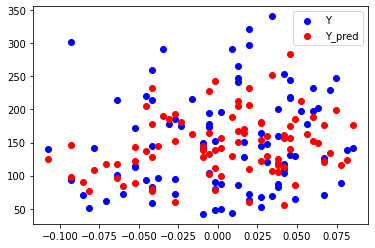

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label='Y', color='b')
plt.scatter(X_test[:, 0], prediction, label='Y_pred', color='r')
plt.legend()
plt.show()

In [14]:
# learning rate 바꿔가면서 loss 변화 양상 확인하기

lr_list = [
    0.001,
    0.01,
    0.1,
    0.5,
    1.,
]
lr_losses = {lr:[] for lr in lr_list}

W_rand = np.random.rand(10)
b_rand = np.random.rand(1)

for lr in lr_list:
    W = W_rand.copy()
    b = b_rand.copy()
    learning_rate = lr
    
    for i in range(5000):
        y_pred = model(X_train, W, b)
        losses = loss(X_train, W, b, y_train)
        lr_losses[lr].append(losses)
        
        dW, db = gradient(X_train, W, b, y_train)
        W -= learning_rate * dW
        b -= learning_rate * db

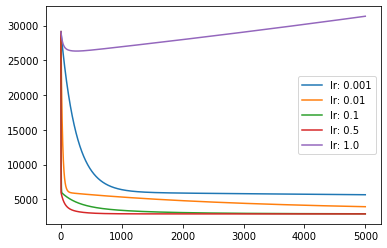

In [15]:
for lr in lr_list:
    plt.plot(lr_losses[lr], label=f"lr: {lr}")
plt.legend()